<a href="https://colab.research.google.com/github/Madhav-Kanda/Edge_Detection_Using_OpenCv/blob/main/EdgeDetection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing numpy,cv2 & matplotlib

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Reading image in grayscale
img = cv.imread('/content/lal_minar.jpg',0)

In [7]:
#Frequency transform is a complex array
#Applying the fast fourier transform on the array of the image
f = np.fft.fft2(img)

In [8]:
#Shifting the zero frequency component to the center so that we can apply the zero frequency mask at the center
fshift = np.fft.fftshift(f)

In [9]:
#Finding the magnitude spectrum
A1 = 20;

In [10]:
# We apply the log transform so that we can reduce the value of the high peaks so that they do not hide the features
magnitude_spectrum = A1*np.log(np.abs(fshift))

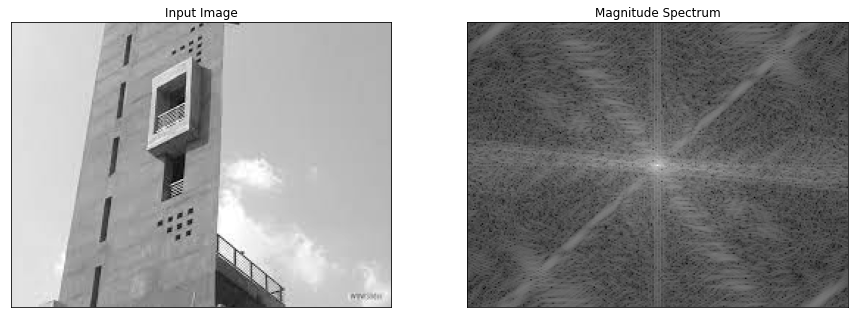

In [24]:
#Plotting the original image and the image after doing the transforms
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
#Center
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

In [13]:
# HPF masking, center 12X12 grid masked 0, remaining all ones
# Applying the filter so as to remove the low frequency component
mask = 12;
fshift[crow-mask:crow+mask, ccol-mask:ccol+mask] = 0


In [14]:
# Finding the magnitude spectrum of masked Fourier Transform
A2 = 2000;
fshift_mask_mag = A2 * np.log(np.abs(fshift))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#Restoring the original indexing
f_ishift = np.fft.ifftshift(fshift)

#Inverse FFT
img_back = np.fft.ifft2(f_ishift)

#Finding the magnitude spectrum
img_back = np.real(img_back)

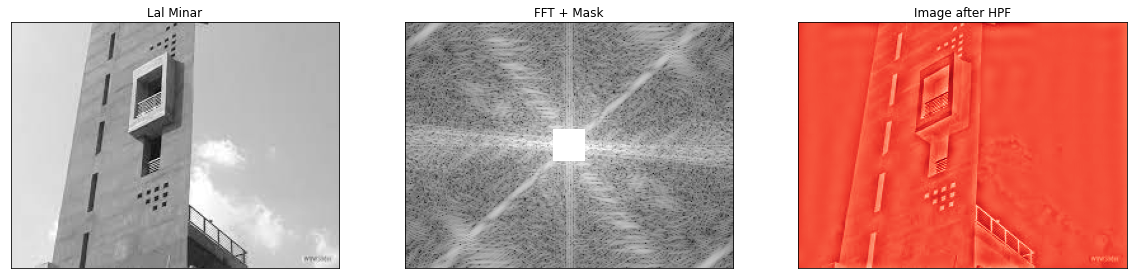

In [25]:
#Plotting
plt.figure(figsize=(20,15))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Lal Minar'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(fshift_mask_mag , cmap = 'gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap = 'Reds')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()